# Amazon Stock Price Prediction using Linear Regessior model

In [3]:
from yahoo_fin.stock_info import get_data
import pandas as pd
import numpy as np

In [4]:
ticker_list = ["AAPL","MSFT","AMZN","TSLA","GOOGL","NVDA","FB","UNH","ACN","ADBE"]
historical_datas = {}
for ticker in ticker_list:
    historical_datas[ticker]=get_data(ticker,start_date="2019-05-01",end_date="2022-05-01",index_as_date =True,interval="1d")

In [5]:
Amazon = historical_datas["AMZN"]
Amazon

,open,high,low,close,adjclose,volume,ticker
2019-05-01,1933.089966,1943.640015,1910.550049,1911.520020,1911.520020,3117000,AMZN
2019-05-02,1913.329956,1921.550049,1881.869995,1900.819946,1900.819946,3962900,AMZN
2019-05-03,1949.000000,1964.400024,1936.000000,1962.459961,1962.459961,6381600,AMZN
2019-05-06,1917.979980,1959.000000,1910.500000,1950.550049,1950.550049,5417800,AMZN
2019-05-07,1939.989990,1949.099976,1903.380005,1921.000000,1921.000000,5902100,AMZN
...,...,...,...,...,...,...,...
2022-04-25,2880.459961,2924.429932,2846.129883,2921.479980,2921.479980,3093700,AMZN
2022-04-26,2896.000000,2897.120117,2778.590088,2787.820068,2787.820068,3876500,AMZN
2022-04-27,2803.830078,2838.969971,2715.669922,2763.340088,2763.340088,3566800,AMZN
2022-04-28,2843.560059,2918.750000,2806.000000,2891.929932,2891.929932,5865800,AMZN


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [9]:
x = Amazon[['open','high','low','close','volume']].values
y = Amazon['close'].values

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
regressor = LinearRegression()

In [31]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
print(regressor.coef_)

[ 5.00561895e-14 -6.67946601e-14  1.32283507e-14  1.00000000e+00
  1.70696790e-15]


In [33]:
print(regressor.intercept_)

-6.809386832173914e-09


In [34]:
predicted = regressor.predict(x_test)

In [35]:
print(predicted)

[3561.57006836 3265.08007812 3334.6899414  1804.66003418 3099.95996094
 1904.28002929 3286.58007812 1860.63000489 3110.2800293  1898.01000977
 3175.11010742 2170.2199707  3182.69995117 1857.52001953 1792.28002929
 1953.94995118 1869.67004394 3162.31005859 3311.37011719 3094.08007812
 3443.62988282 3116.41992187 3399.4399414  1997.58996582 3204.39990234
 3631.19995117 3195.68994141 3036.14990235 1901.05004883 1760.32995605
 3259.94995117 2317.80004883 3194.5        3478.05004883 1739.83996582
 3286.64990235 1822.68005371 3138.83007813 3298.98999023 1762.17004394
 3104.19995117 1853.25       3375.98999023 1792.56994629 2572.67993164
 2951.94995117 3172.6899414  3195.34008789 1900.81994629 3284.7199707
 3299.17993164 1964.52001953 3437.36010742 3175.12011719 2379.61010742
 3421.37011718 3349.64990234 2133.90991211 3421.57006836 2011.59997559
 3448.13989257 1720.26000976 3318.11010742 3102.9699707  3472.5
 3354.7199707  2600.86010742 3288.62011718 3416.         2367.91992188
 2852.86010743

In [36]:
df = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':predicted.flatten()})

In [37]:
df.head(25)

,Actual,Predicted
0,3561.570068,3561.570068
1,3265.080078,3265.080078
2,3334.689941,3334.689941
3,1804.660034,1804.660034
4,3099.959961,3099.959961
5,1904.280029,1904.280029
6,3286.580078,3286.580078
7,1860.630005,1860.630005
8,3110.280029,3110.280029
9,1898.010010,1898.010010


In [38]:
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,predicted))
print('mean_squared_error:',metrics.mean_squared_error(y_test,predicted))
print('root_mean_squared_error:',np.sqrt(metrics.mean_absolute_error(y_test,predicted)))

mean_absolute_error: 1.950311164029316e-09
mean_squared_error: 6.1308629201393e-18
root_mean_squared_error: 4.4162327429940964e-05


In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
graph = df.head(25)

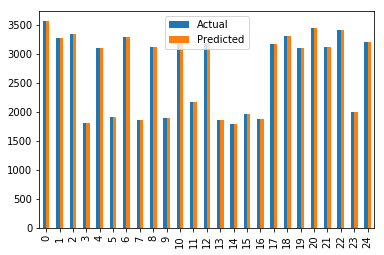

In [42]:
graph.plot(kind='bar')